In [1]:
import xarray as xr
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
rh_cumulative_layer_path = '/data/workflows/BONA-black-spruce-fire-1930-RH_cumulative/output/RH_monthly_tr.nc'
rh_layer_cumulative = xr.open_dataset(rh_cumulative_layer_path)
rh_layer_cumulative['time'] = rh_layer_cumulative.indexes['time'].to_datetimeindex()
rh_layer_cumulative = rh_layer_cumulative.to_dataframe().reset_index().drop(columns=['x', 'y'])
rh_layer_cumulative['time'] = pd.to_datetime(rh_layer_cumulative['time'])
rh_layer_cumulative['year'] = rh_layer_cumulative['time'].dt.year
rh_layer_cumulative = rh_layer_cumulative.groupby(by=['year']).sum().reset_index()

/tmp/ipykernel_11653/3730198356.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  rh_layer_cumulative['time'] = rh_layer_cumulative.indexes['time'].to_datetimeindex()


In [5]:
deadc_path = '/data/workflows/BONA-black-spruce-fire-1930/output/DEADC_yearly_tr.nc'
deadc = xr.open_dataset(deadc_path)
deadc['time'] = deadc.indexes['time'].to_datetimeindex()
deadc = deadc.to_dataframe().reset_index().drop(columns=['x', 'y'])
deadc['time'] = pd.to_datetime(deadc['time'])
deadc['year'] = deadc['time'].dt.year
deadc = deadc.groupby(by=['year']).sum().reset_index()

/tmp/ipykernel_11653/2253364036.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  deadc['time'] = deadc.indexes['time'].to_datetimeindex()


In [11]:
dwdc_path = '/data/workflows/BONA-black-spruce-fire-1930/output/DWDC_yearly_tr.nc'
dwdc = xr.open_dataset(dwdc_path)
dwdc['time'] = dwdc.indexes['time'].to_datetimeindex()
dwdc = dwdc.to_dataframe().reset_index().drop(columns=['x', 'y'])
dwdc['time'] = pd.to_datetime(dwdc['time'])
dwdc['year'] = dwdc['time'].dt.year
dwdc = dwdc.groupby(by=['year']).sum().reset_index()

/tmp/ipykernel_11653/2940492388.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dwdc['time'] = dwdc.indexes['time'].to_datetimeindex()


In [3]:
rh_layer_path = '/data/workflows/BONA-black-spruce-fire-1930/output/RH_monthly_tr.nc'
rh_layer = xr.open_dataset(rh_layer_path)
rh_layer['time'] = rh_layer.indexes['time'].to_datetimeindex()
rh_layer = rh_layer.to_dataframe().reset_index().drop(columns=['x', 'y'])
rh_layer['time'] = pd.to_datetime(rh_layer['time'])
rh_layer['year'] = rh_layer['time'].dt.year
rh_layer_yearly = rh_layer.groupby(by=['year', 'layer']).sum().reset_index()
rh_layer_yearly_sum = rh_layer.groupby(by=['year']).sum().reset_index()

/tmp/ipykernel_33074/1509353966.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  rh_layer['time'] = rh_layer.indexes['time'].to_datetimeindex()


In [4]:
lwc_layer_path = '/data/workflows/BONA-black-spruce-fire-1930/output/LWCLAYER_yearly_tr.nc'
lwc_layer = xr.open_dataset(lwc_layer_path)
lwc_layer['time'] = lwc_layer.indexes['time'].to_datetimeindex()
lwc_layer = lwc_layer.to_dataframe().reset_index().drop(columns=['x', 'y'])
lwc_layer['time'] = pd.to_datetime(lwc_layer['time'])
lwc_layer['year'] = lwc_layer['time'].dt.year
lwc_layer_yearly = lwc_layer.groupby(by=['year', 'layer']).mean().reset_index()

/tmp/ipykernel_33074/4279236390.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  lwc_layer['time'] = lwc_layer.indexes['time'].to_datetimeindex()


In [5]:
t_layer_path = '/data/workflows/BONA-black-spruce-fire-1930/output/TLAYER_yearly_tr.nc'
t_layer = xr.open_dataset(t_layer_path)
t_layer['time'] = t_layer.indexes['time'].to_datetimeindex()
t_layer = t_layer.to_dataframe().reset_index().drop(columns=['x', 'y'])
t_layer['time'] = pd.to_datetime(t_layer['time'])
t_layer['year'] = t_layer['time'].dt.year
t_layer_yearly = t_layer.groupby(by=['year', 'layer']).mean().reset_index()

/tmp/ipykernel_33074/991711402.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  t_layer['time'] = t_layer.indexes['time'].to_datetimeindex()


<AxesSubplot:xlabel='year', ylabel='RH'>

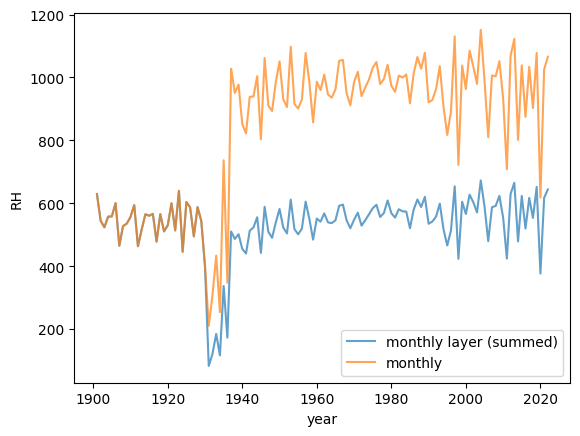

In [6]:
fig, ax = plt.subplots()
sns.lineplot(data=rh_layer_yearly_sum, x='year', y='RH', label = 'monthly layer (summed)', alpha=0.7)
sns.lineplot(data=rh_layer_cumulative, x='year', y='RH', label = 'monthly', alpha=0.7)

<AxesSubplot:xlabel='year', ylabel='RH'>

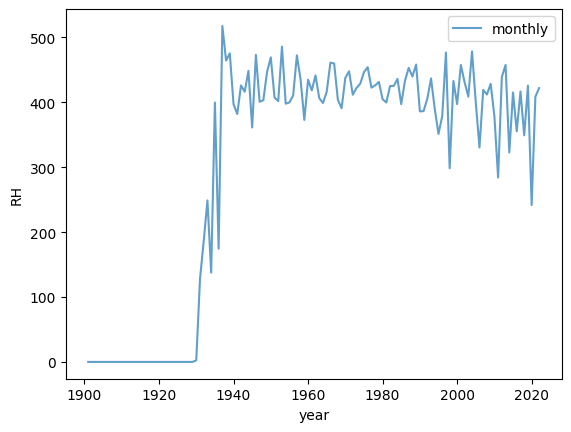

In [10]:
sns.lineplot(x=rh_layer_cumulative['year'], y=rh_layer_cumulative['RH']-rh_layer_yearly_sum['RH'], 
             label = 'monthly', alpha=0.7)

<AxesSubplot:xlabel='year', ylabel='DWDC'>

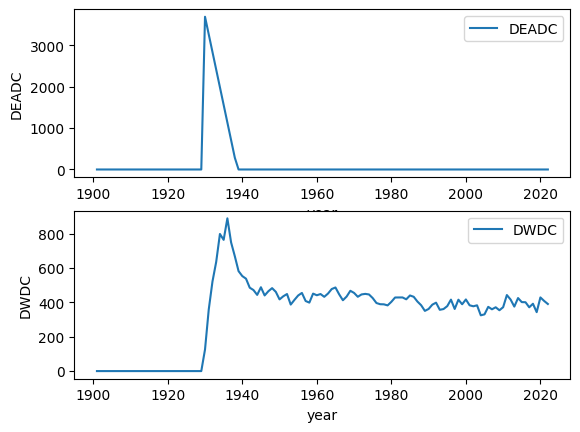

In [12]:
fig, axes = plt.subplots(2,1)
sns.lineplot(data=deadc, x='year', y='DEADC', ax=axes[0], label='DEADC')
sns.lineplot(data=dwdc, x='year', y='DWDC', ax=axes[1], label='DWDC')